In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [10]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
print("Dataset Shape:", df.shape)
print("\
Basic Information:")
df.info()
print("\
First few rows:")
print(df.head())
print("\
Descriptive Statistics:")
df.describe()

Dataset Shape: (1000, 8)
Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
First few rows:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  f

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


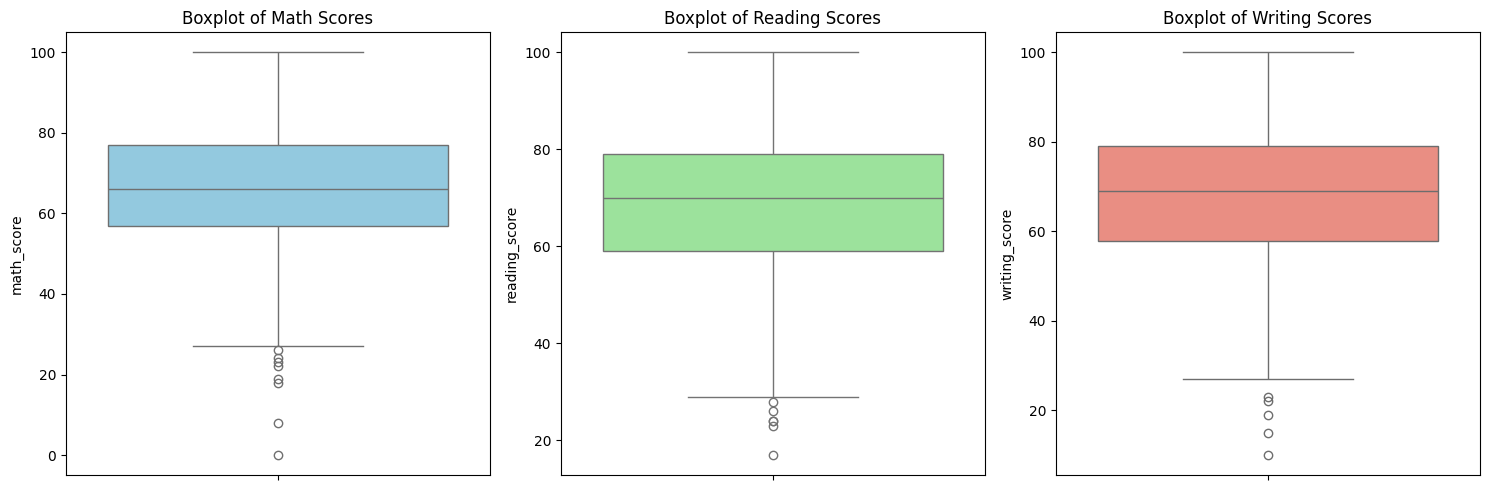

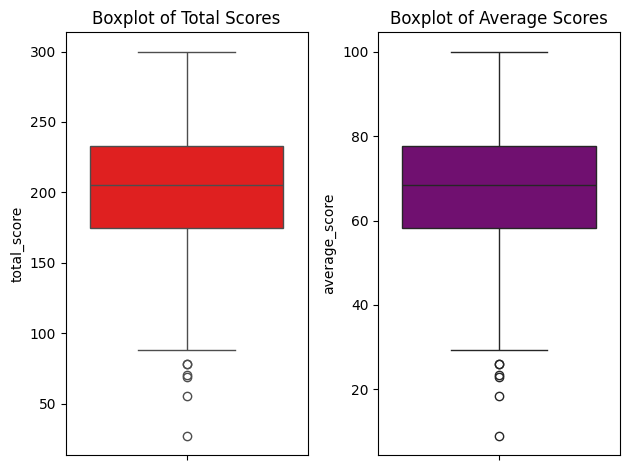

In [18]:
# Boxplots to visualize outliers in numerical columns
plt.figure(figsize=(15, 5))

# Math Score
plt.subplot(1, 3, 1)
sns.boxplot(y=df['math_score'], color='skyblue')
plt.title('Boxplot of Math Scores')

# Reading Score
plt.subplot(1, 3, 2)
sns.boxplot(y=df['reading_score'], color='lightgreen')
plt.title('Boxplot of Reading Scores')

# Writing Score
plt.subplot(1, 3, 3)
sns.boxplot(y=df['writing_score'], color='salmon')
plt.title('Boxplot of Writing Scores')

plt.tight_layout()
plt.savefig('Boxplot_of_maths_reading_writing_scores.png')
plt.show()

#Total Score
plt.subplot(1, 2, 1)
sns.boxplot(y=df['total_score'], color='red')
plt.title('Boxplot of Total Scores')

#Average Score
plt.subplot(1, 2, 2)
sns.boxplot(y=df['average_score'], color='purple')
plt.title('Boxplot of Average Scores')

plt.tight_layout()
plt.savefig('Boxplot_of_total_score_and_average_scores.png')
plt.show()

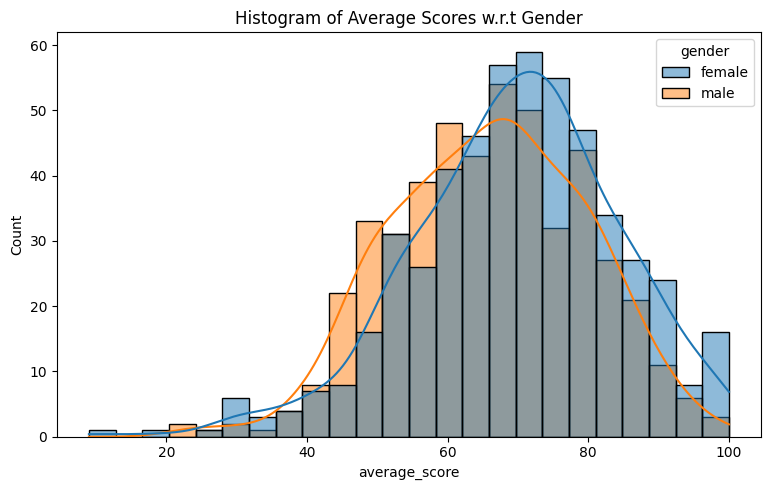

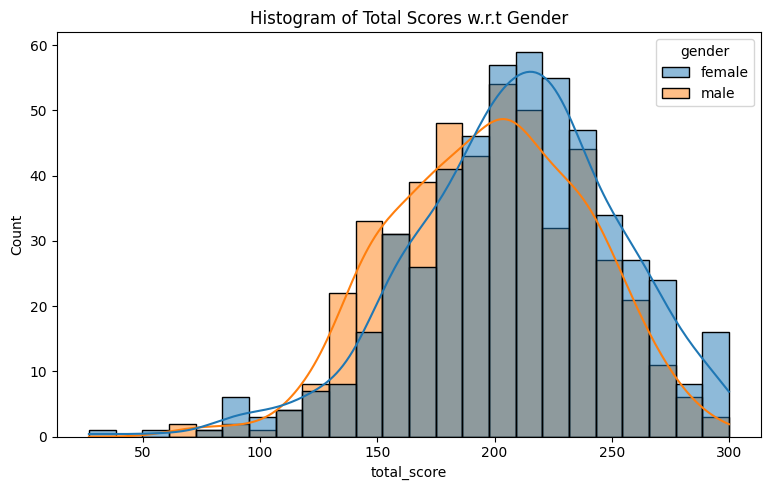

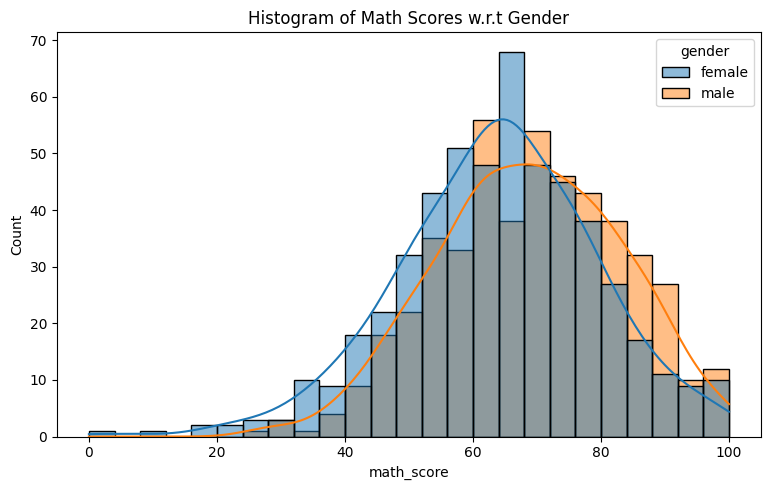

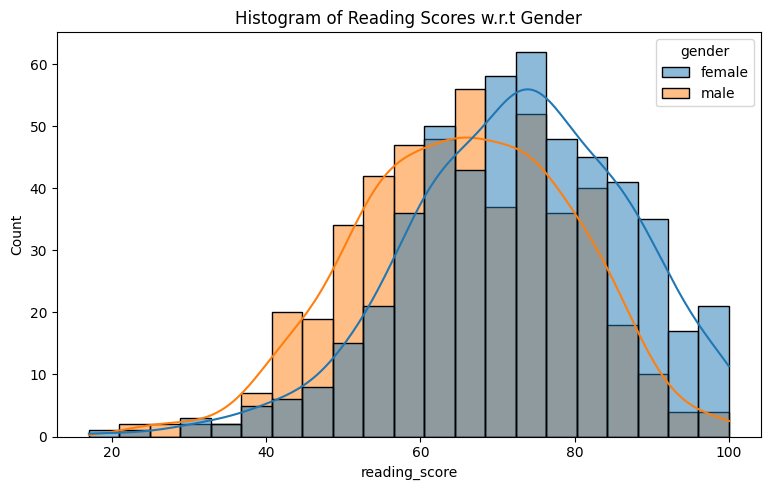

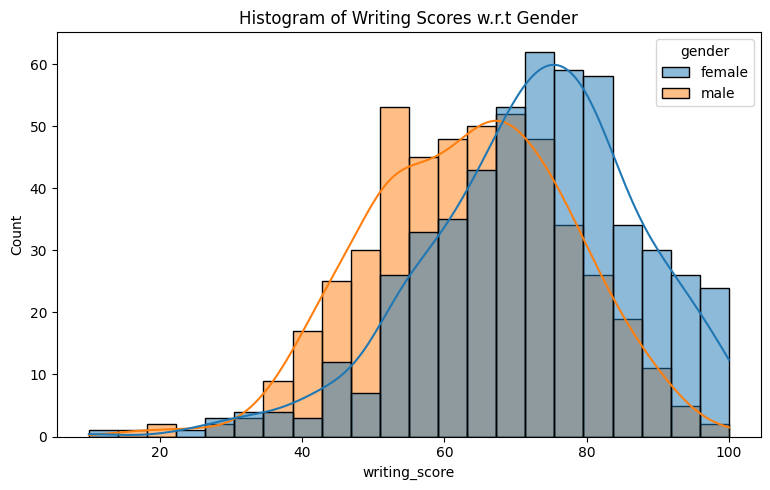

In [61]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(x=df['average_score'], hue=df['gender'], color='skyblue', kde=True)
plt.title('Histogram of Average Scores w.r.t Gender')
plt.tight_layout()
plt.savefig('Histogram_of_Average_Scores_w.r.t_Gender.png')
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(x=df['total_score'], hue=df['gender'], color='skyblue', kde=True)
plt.title('Histogram of Total Scores w.r.t Gender')
plt.tight_layout()
plt.savefig('Histogram_of_Total_Scores_w.r.t_Gender.png')
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(x=df['math_score'], hue=df['gender'], color='skyblue', kde=True)
plt.title('Histogram of Math Scores w.r.t Gender')
plt.tight_layout()
plt.savefig('Histogram_of_Math_Scores_w.r.t_Gender.png')
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(x=df['reading_score'], hue=df['gender'], color='skyblue', kde=True)
plt.title('Histogram of Reading Scores w.r.t Gender')
plt.tight_layout()
plt.savefig('Histogram_of_Reading_Scores_w.r.t_Gender.png')
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(x=df['writing_score'], hue=df['gender'], color='skyblue', kde=True)
plt.title('Histogram of Writing Scores w.r.t Gender')
plt.tight_layout()
plt.savefig('Histogram_of_Writing_Scores_w.r.t_Gender.png')
plt.show()

               math_score  reading_score  writing_score  total_score  \
math_score       1.000000       0.817580       0.802642     0.918746   
reading_score    0.817580       1.000000       0.954598     0.970331   
writing_score    0.802642       0.954598       1.000000     0.965667   
total_score      0.918746       0.970331       0.965667     1.000000   
average_score    0.918746       0.970331       0.965667     1.000000   

               average_score  
math_score          0.918746  
reading_score       0.970331  
writing_score       0.965667  
total_score         1.000000  
average_score       1.000000  


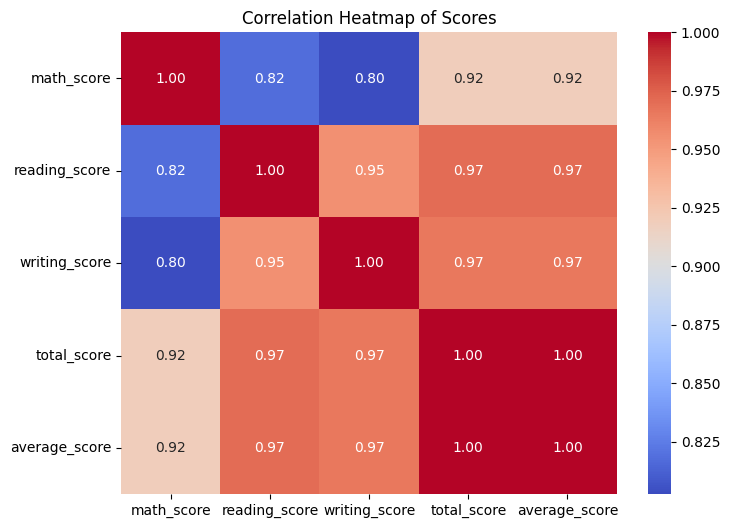

In [19]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Scores')
plt.savefig('Correlation_Heatmap_of_Scores.png')
plt.show()

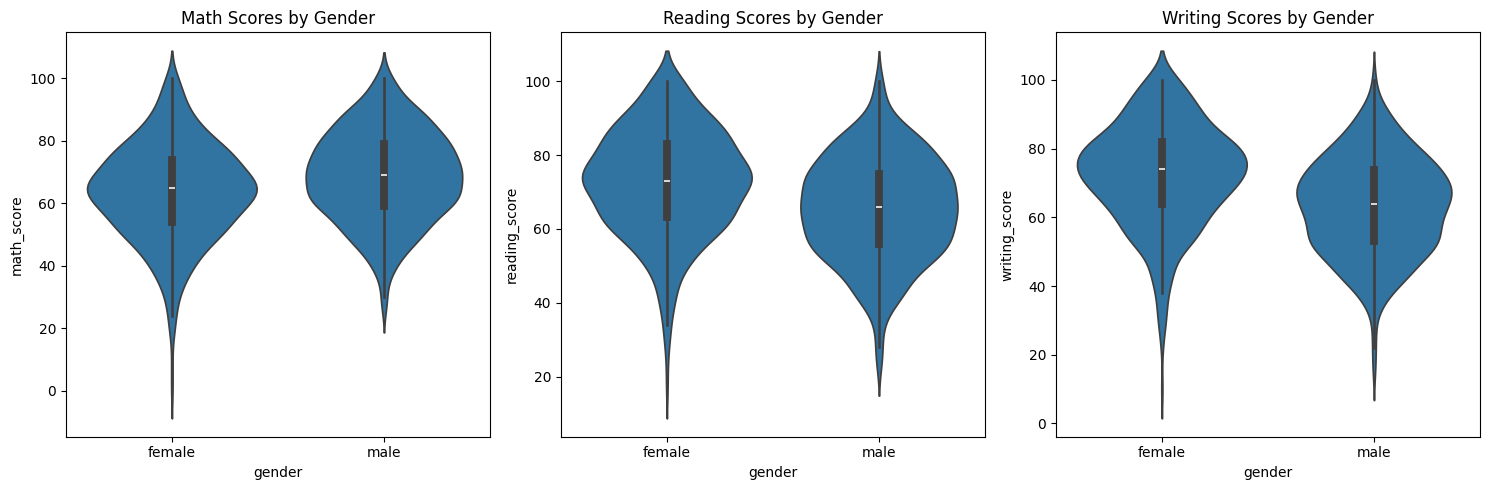

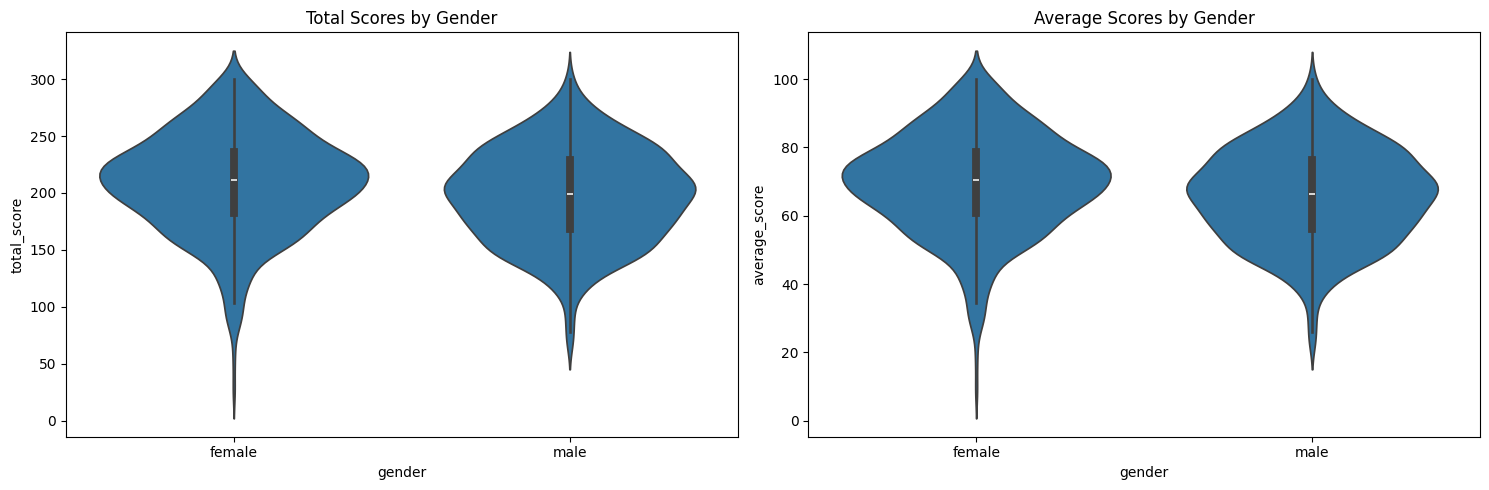

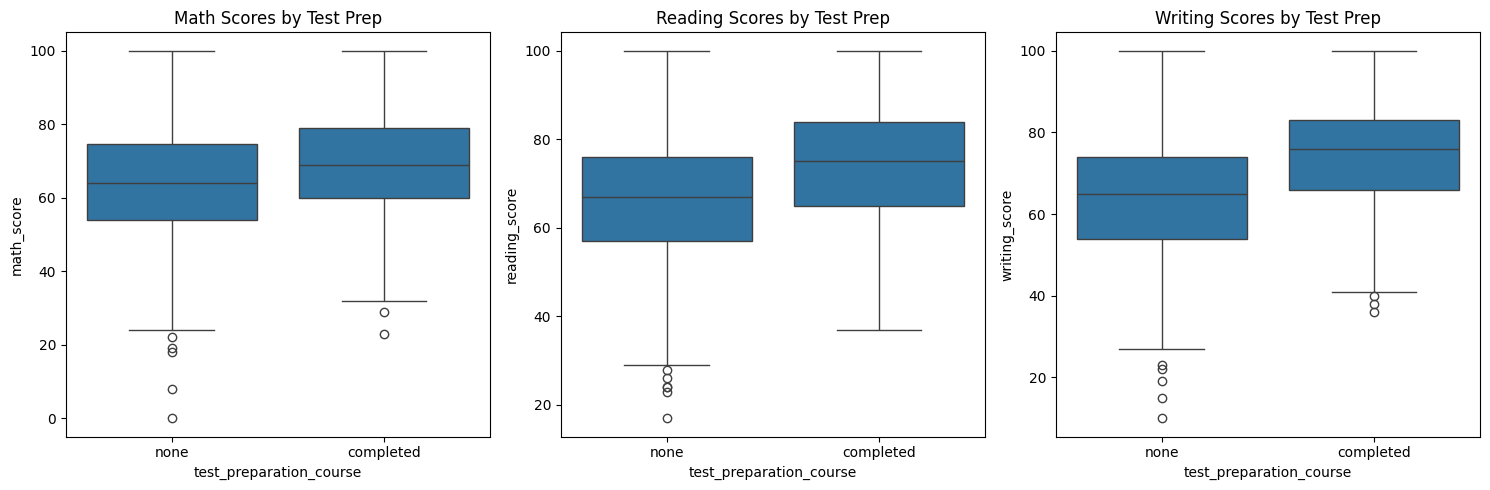

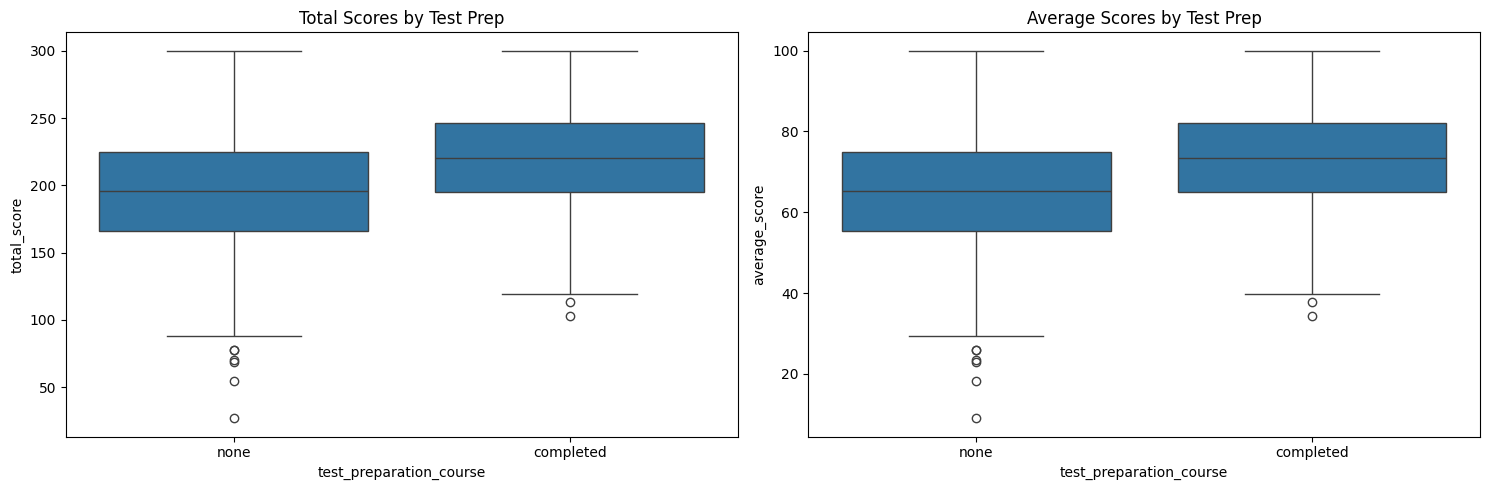

In [20]:
# Distribution of scores by gender
# Violin plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.violinplot(x='gender', y='math_score', data=df)
plt.title('Math Scores by Gender')

plt.subplot(1, 3, 2)
sns.violinplot(x='gender', y='reading_score', data=df)
plt.title('Reading Scores by Gender')

plt.subplot(1, 3, 3)
sns.violinplot(x='gender', y='writing_score', data=df)
plt.title('Writing Scores by Gender')

plt.tight_layout()
plt.savefig("Distribution_of_scores_by_gender.png")
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.violinplot(x='gender', y='total_score', data=df)
plt.title('Total Scores by Gender')

plt.subplot(1, 2, 2)
sns.violinplot(x='gender', y='average_score', data=df)
plt.title('Average Scores by Gender')

plt.tight_layout()
plt.savefig("Distribution_of_total_and_average_scores_by_gender.png")
plt.show()


# Distribution of scores by test preparation course
# Boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='test_preparation_course', y='math_score', data=df)
plt.title('Math Scores by Test Prep')

plt.subplot(1, 3, 2)
sns.boxplot(x='test_preparation_course', y='reading_score', data=df)
plt.title('Reading Scores by Test Prep')

plt.subplot(1, 3, 3)
sns.boxplot(x='test_preparation_course', y='writing_score', data=df)
plt.title('Writing Scores by Test Prep')

plt.tight_layout()
plt.savefig("Distribution_of_scores_by_test_preparation_course_1.png")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='test_preparation_course', y='total_score', data=df)
plt.title('Total Scores by Test Prep')

plt.subplot(1, 2, 2)
sns.boxplot(x='test_preparation_course', y='average_score', data=df)
plt.title('Average Scores by Test Prep')

plt.tight_layout()
plt.savefig("Distribution_of_scores_by_test_preparation_course_2.png")
plt.show()

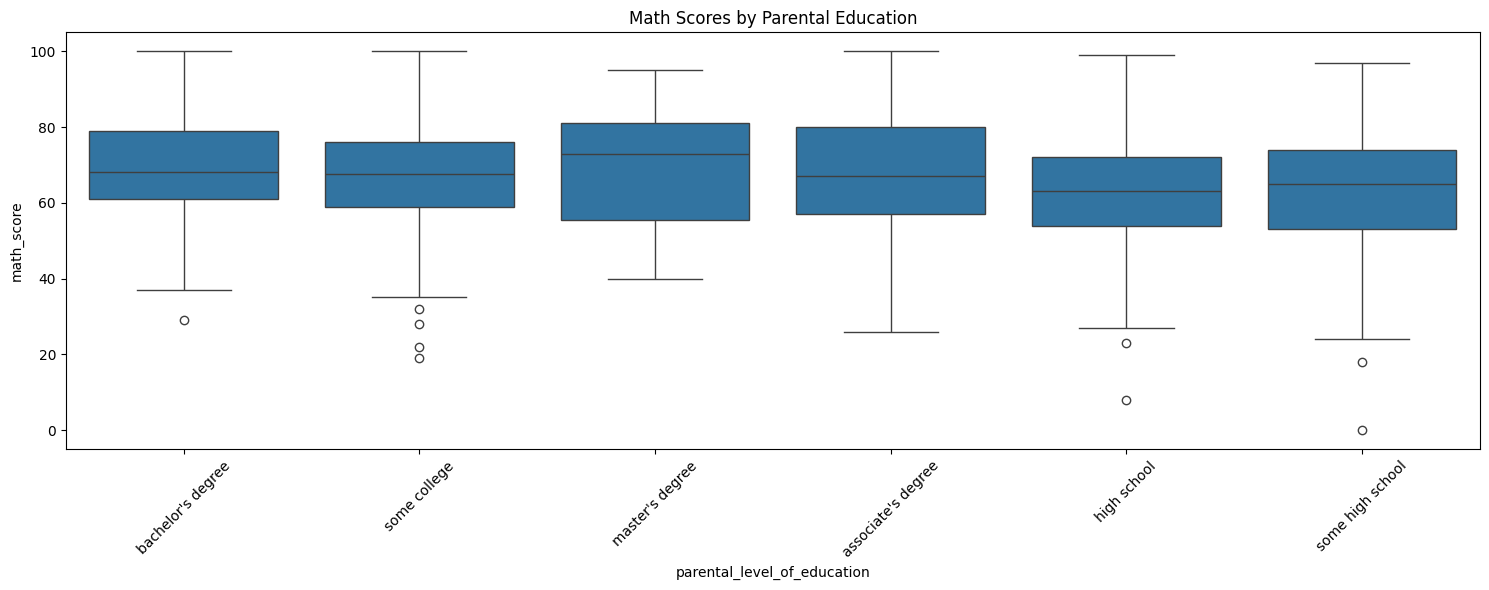

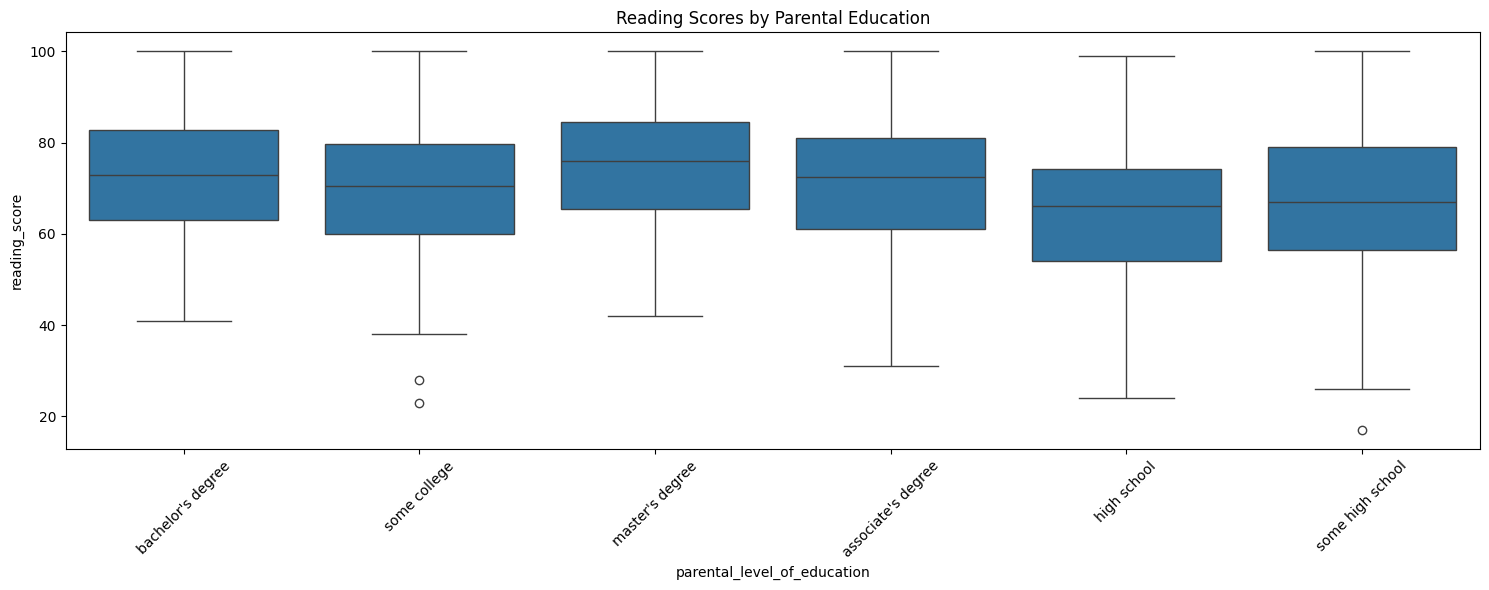

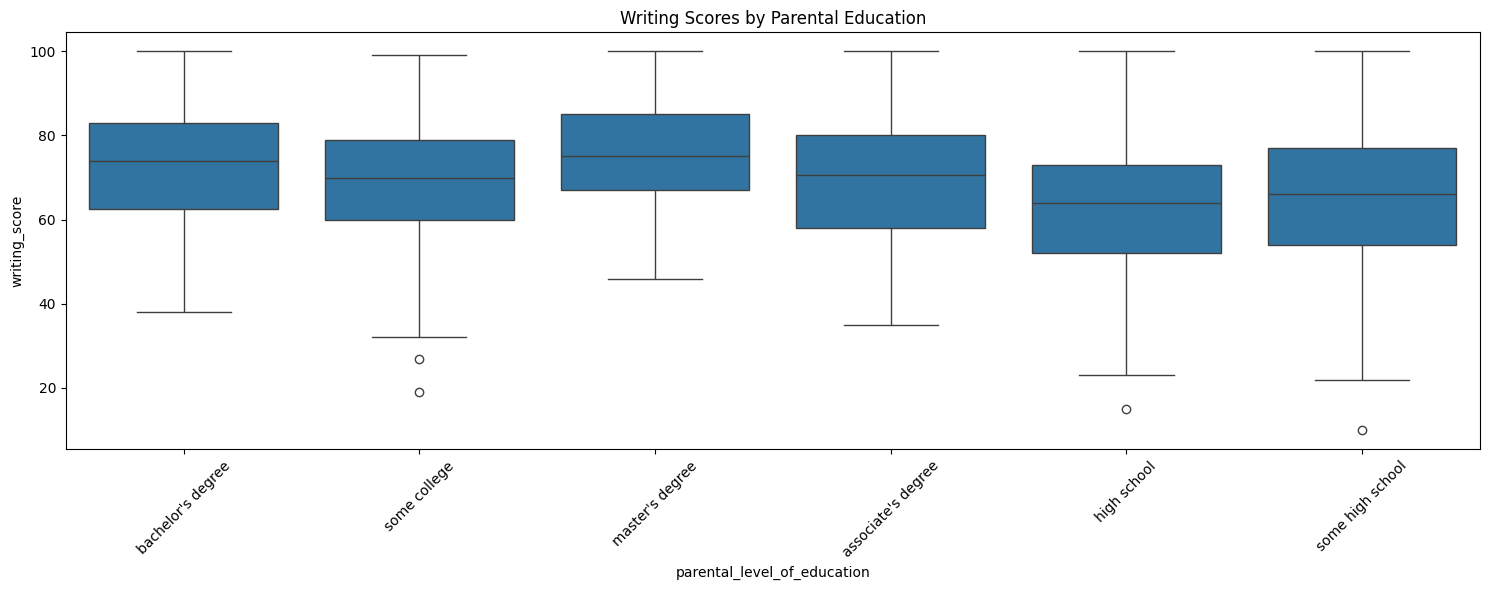

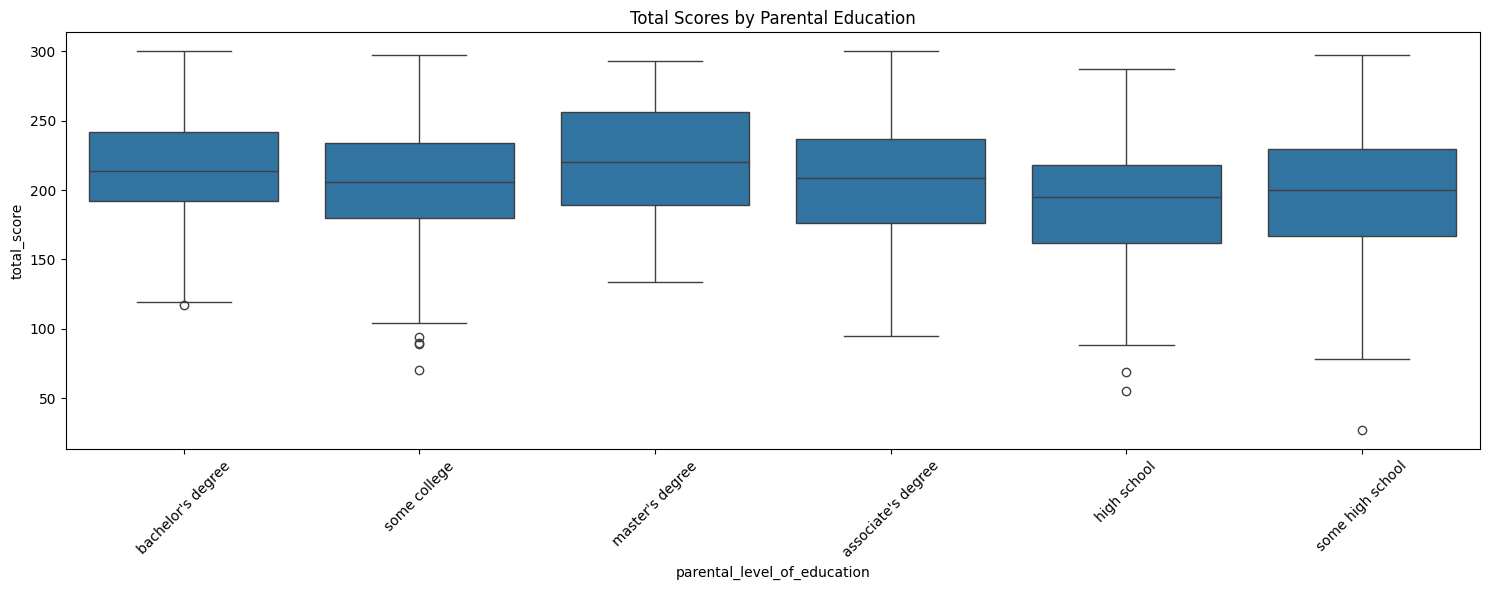

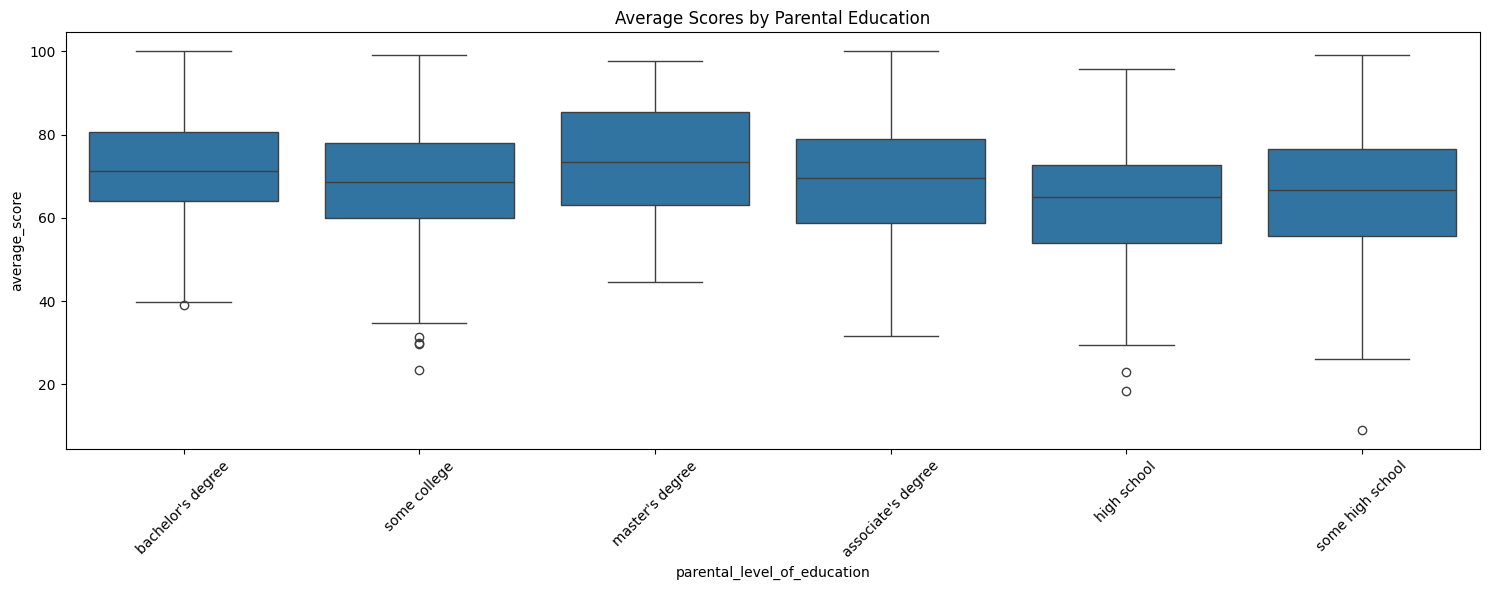

In [21]:
# Analyze scores by parental education
plt.figure(figsize=(15, 6))
sns.boxplot(x='parental_level_of_education', y='math_score', data=df)
plt.xticks(rotation=45)
plt.title('Math Scores by Parental Education')
plt.tight_layout()
plt.savefig("Math_Scores_by_Parental_Education.png")
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='parental_level_of_education', y='reading_score', data=df)
plt.xticks(rotation=45)
plt.title('Reading Scores by Parental Education')
plt.tight_layout()
plt.savefig("Redaing_Scores_by_Parental_Education.png")
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='parental_level_of_education', y='writing_score', data=df)
plt.xticks(rotation=45)
plt.title('Writing Scores by Parental Education')
plt.tight_layout()
plt.savefig("Writing_Scores_by_Parental_Education.png")
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='parental_level_of_education', y='total_score', data=df)
plt.xticks(rotation=45)
plt.title('Total Scores by Parental Education')
plt.tight_layout()
plt.savefig("Total_Scores_by_Parental_Education.png")
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='parental_level_of_education', y='average_score', data=df)
plt.xticks(rotation=45)
plt.title('Average Scores by Parental Education')
plt.tight_layout()
plt.savefig("Average_Scores_by_Parental_Education.png")
plt.show()


In [23]:
# Prepare data for ML
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
le = LabelEncoder()

df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

numerical_columns = ['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']
for col in numerical_columns:
    print(f"Number of outliers in {col}: {detect_outliers(df, col)}")

print("\
Encoded DataFrame Preview:")
print(df_encoded.head())

Number of outliers in math_score: 8
Number of outliers in reading_score: 6
Number of outliers in writing_score: 5
Number of outliers in total_score: 6
Number of outliers in average_score: 6
Encoded DataFrame Preview:
   gender  race_ethnicity  parental_level_of_education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        1          72             72             74   
1                        0          69             90             88   
2                        1          90             95             93   
3                        1          47             57             44   
4                        1      

In [ ]:
# Remove outliers using IQR method
def remove_outliers(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

# Remove outliers from numerical columns
numerical_columns = ['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']
df_clean = remove_outliers(df_encoded, numerical_columns)

# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

print("Original dataset shape:", df_encoded.shape)
print("Clean dataset shape:", df_clean.shape)
print("\
Normalized data preview:")
print(df_clean.head())

# Visualize normalized distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Normalized {col}')
plt.tight_layout()
plt.savefig("Normalized_distributions_of_scores.png")
plt.show()

In [36]:
# Remove outliers using IQR method
def remove_outliers(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

# Remove outliers from numerical columns
numerical_columns = ['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']
df_clean = remove_outliers(df_encoded, numerical_columns)

print("Original dataset shape:", df_encoded.shape)
print("Clean dataset shape:", df_clean.shape)
print("\nCleaned data preview:")
print(df_clean)

Original dataset shape: (1000, 10)
Clean dataset shape: (988, 10)

Cleaned data preview:
     gender  race_ethnicity  parental_level_of_education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test_preparation_course  math_score  reading_score  writing_score  \
0                          1    

Original dataset shape: (1000, 10)
Clean dataset shape: (988, 10)
Normalized data preview:
     gender  race_ethnicity  parental_level_of_education     lunch  \
0 -0.968119       -1.021672                    -0.806072  0.732494   
1 -0.968119       -0.156709                     0.834860  0.732494   
2 -0.968119       -1.021672                     0.287883  0.732494   
3  1.032931       -1.886636                    -1.353049 -1.365199   
4  1.032931       -0.156709                     0.834860  0.732494   

   test_preparation_course  math_score  reading_score  writing_score  \
0                 0.752176    0.373174       0.168406       0.374241   
1                -1.329476    0.164871       1.453233       1.338567   
2                 0.752176    1.622992       1.810130       1.682969   
3                 0.752176   -1.362684      -0.902283      -1.692172   
4                 0.752176    0.650912       0.596682       0.443121   

   total_score  average_score  
0     0.323940       0.

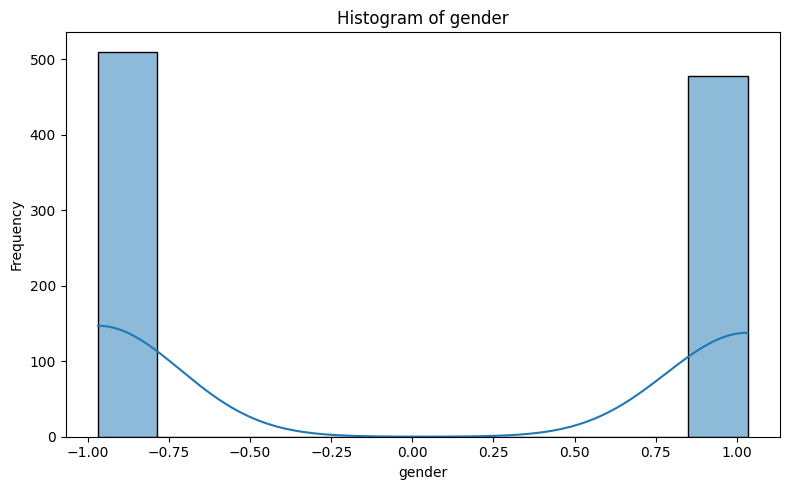

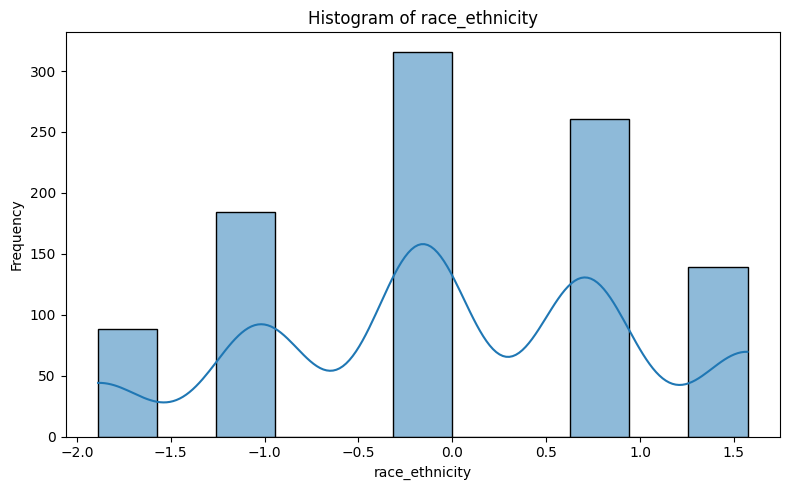

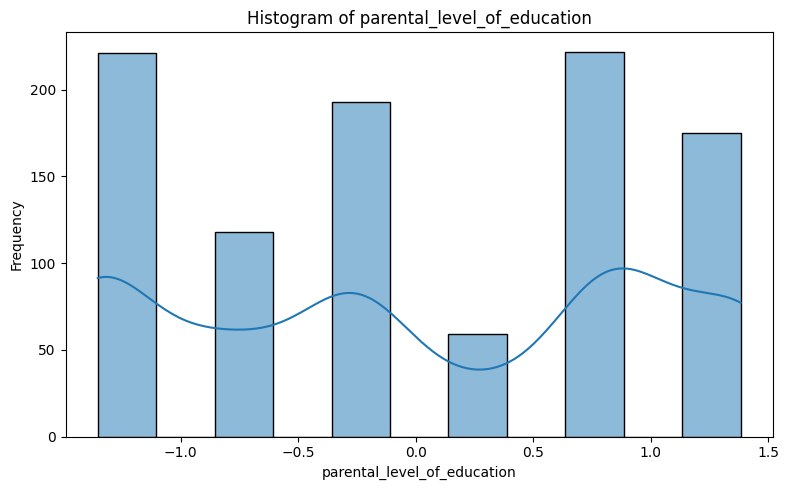

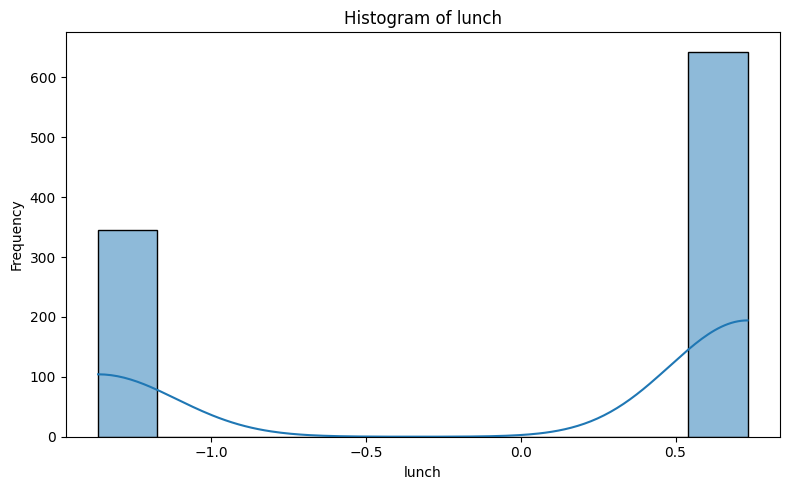

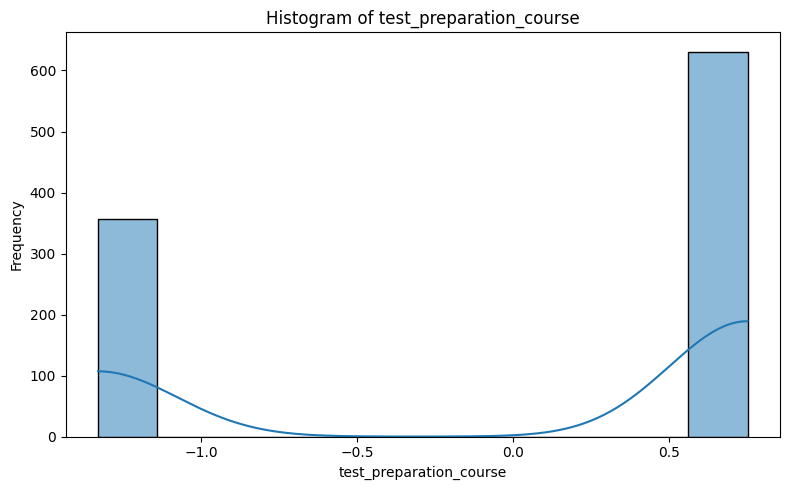

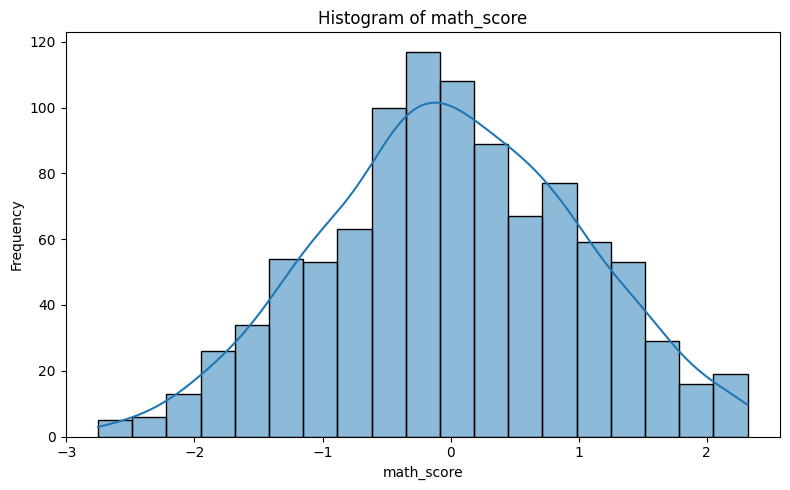

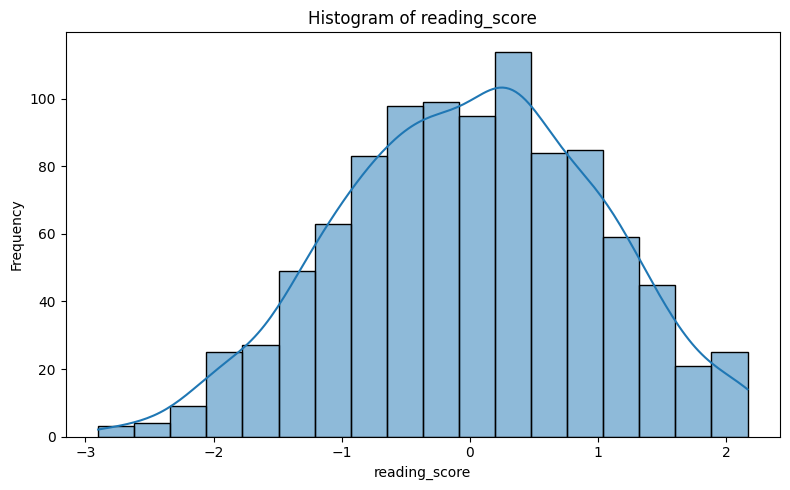

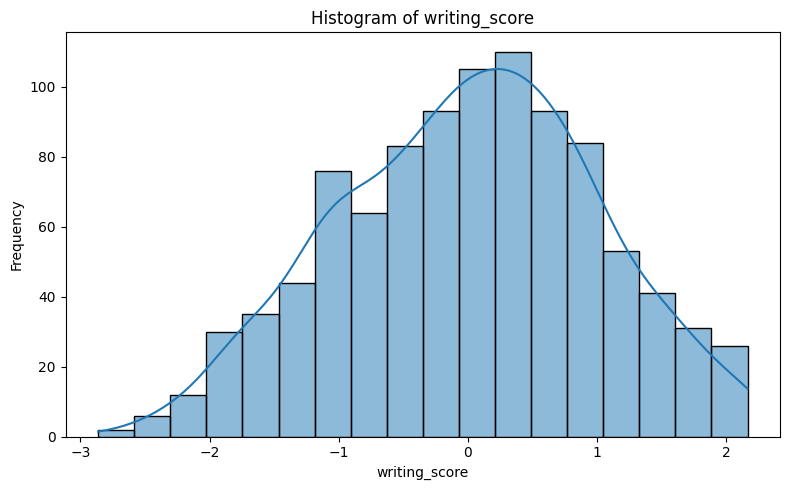

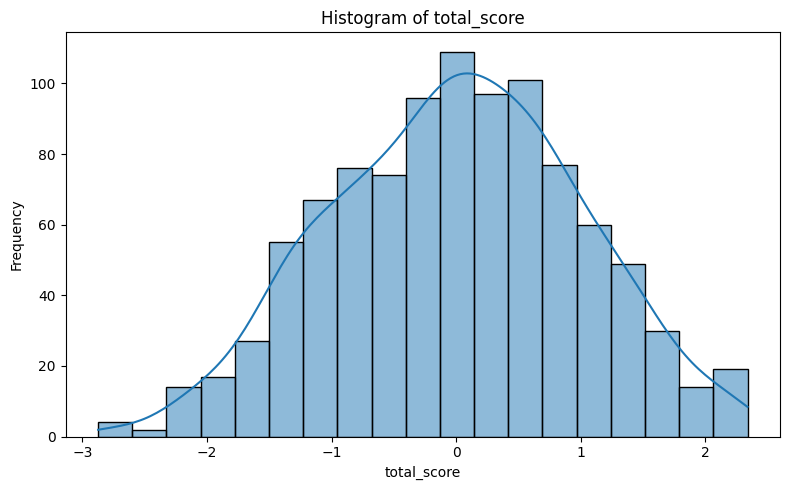

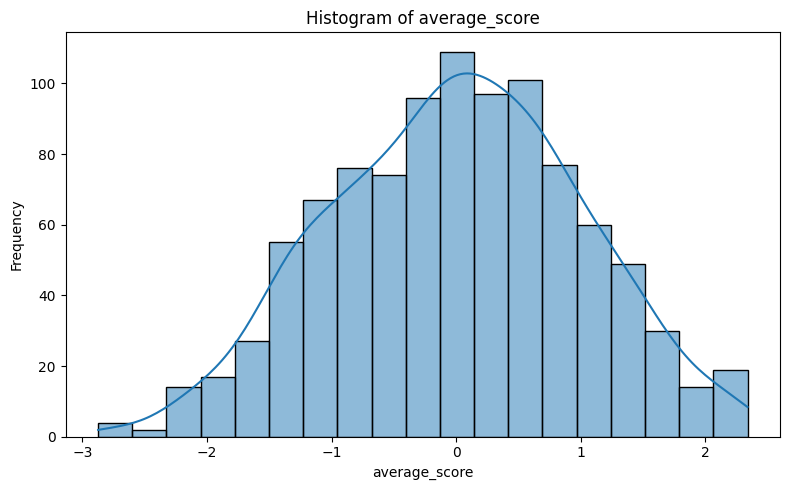

In [37]:
numerical_columns = df_clean.select_dtypes(include=['float', 'int']).columns

scaler = StandardScaler()
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

print("Original dataset shape:", df_encoded.shape)
print("Clean dataset shape:", df_clean.shape)
print("\
Normalized data preview:")
print(df_clean.head())

# Visualize normalized distributions
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 5))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f"Normalized_distributions_of_{col} .png")
    plt.show()

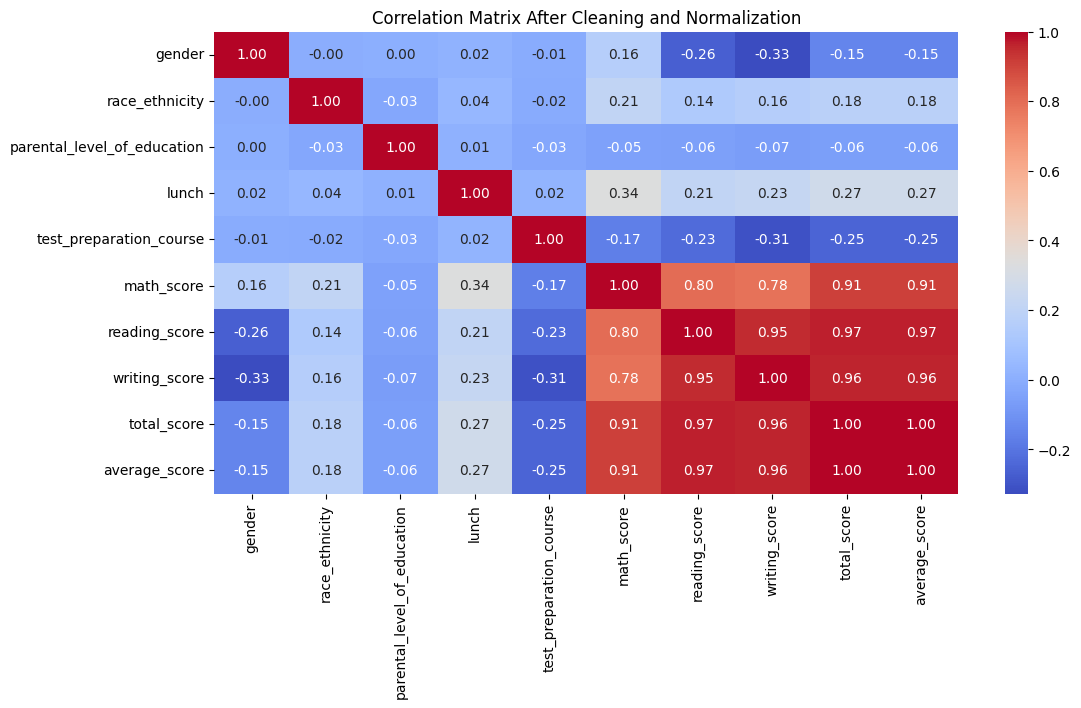

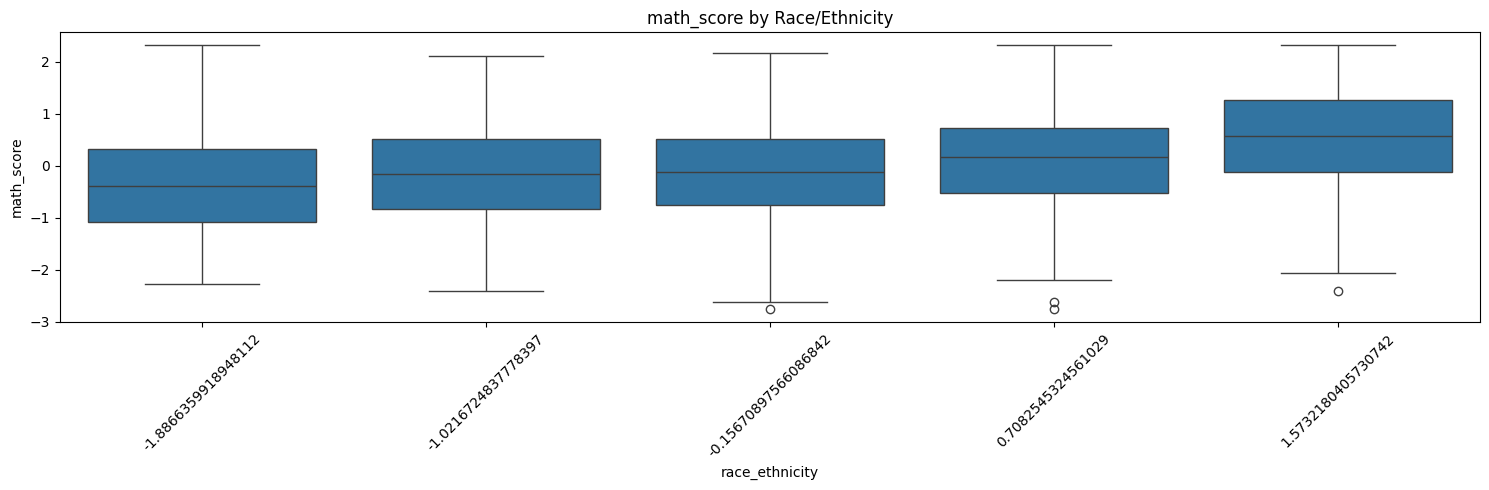

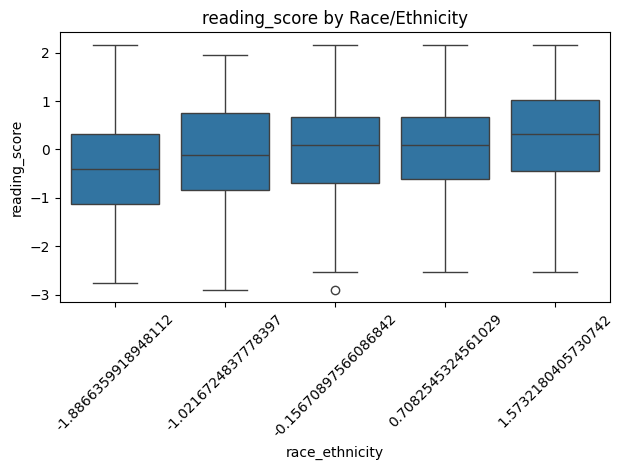

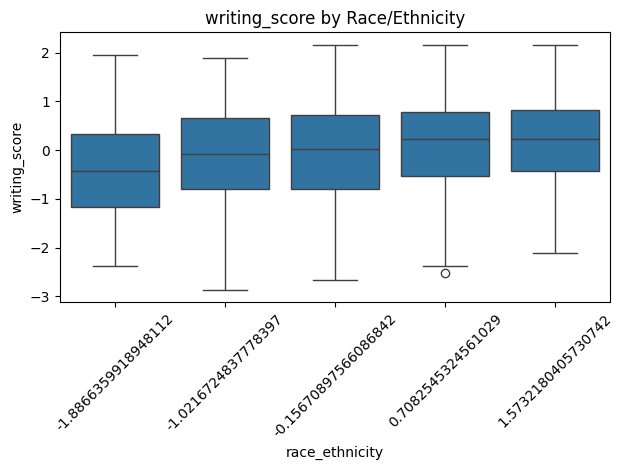

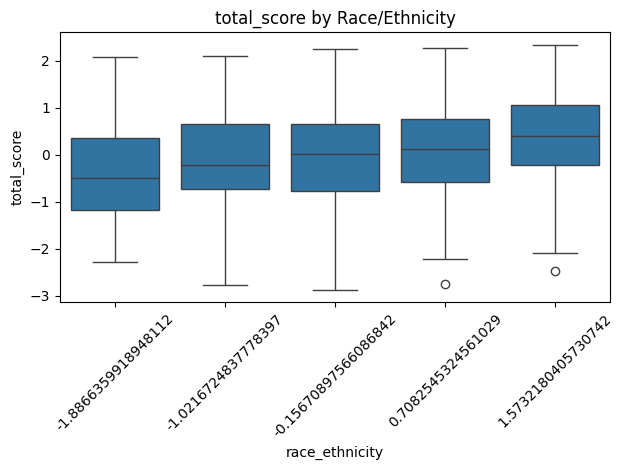

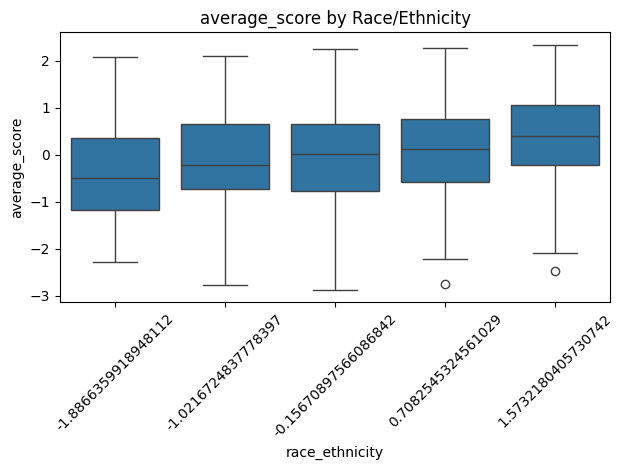

In [38]:
# Analyze relationships between variables after cleaning
plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Cleaning and Normalization')
plt.savefig('Correlation_matrix_after_cleaning_and_normalization.png')
plt.show()

# Distribution by race/ethnicity
plt.figure(figsize=(15, 5))
for i, score in enumerate(['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']):
    sns.boxplot(x='race_ethnicity', y=score, data=df_clean)
    plt.title(f'{score} by Race/Ethnicity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{score}_by_race_ethnicity.png")
    plt.show()

In [47]:
print("Preview of Cleaned Data \n", df_clean.head())
print("Shape: \n", df_clean.shape)
print("Info: \n", df_clean.info())

Preview of Cleaned Data 
      gender  race_ethnicity  parental_level_of_education     lunch  \
0 -0.968119       -1.021672                    -0.806072  0.732494   
1 -0.968119       -0.156709                     0.834860  0.732494   
2 -0.968119       -1.021672                     0.287883  0.732494   
3  1.032931       -1.886636                    -1.353049 -1.365199   
4  1.032931       -0.156709                     0.834860  0.732494   

   test_preparation_course  math_score  reading_score  writing_score  \
0                 0.752176    0.373174       0.168406       0.374241   
1                -1.329476    0.164871       1.453233       1.338567   
2                 0.752176    1.622992       1.810130       1.682969   
3                 0.752176   -1.362684      -0.902283      -1.692172   
4                 0.752176    0.650912       0.596682       0.443121   

   total_score  average_score  
0     0.323940       0.323940  
1     1.037409       1.037409  
2     1.800083       1.8

In [41]:
df_clean.describe()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,9.880000e+02,9.880000e+02,9.880000e+02,9.880000e+02,9.880000e+02,9.880000e+02,9.880000e+02,9.880000e+02,9.880000e+02,9.880000e+02
mean,-5.393796e-17,-1.438346e-16,-1.222594e-16,-3.236278e-17,3.775657e-17,-4.782499e-16,6.112969e-17,3.991409e-16,3.452029e-16,-7.047894e-16
std,1.000506e+00,1.000506e+00,1.000506e+00,1.000506e+00,1.000506e+00,1.000506e+00,1.000506e+00,1.000506e+00,1.000506e+00,1.000506e+00
min,-9.681193e-01,-1.886636e+00,-1.353049e+00,-1.365199e+00,-1.329476e+00,-2.751370e+00,-2.900904e+00,-2.863139e+00,-2.874370e+00,-2.874370e+00
25%,-9.681193e-01,-1.021672e+00,-8.060716e-01,-1.365199e+00,-1.329476e+00,-6.683405e-01,-6.881456e-01,-7.278457e-01,-7.093605e-01,-7.093605e-01
50%,-9.681193e-01,-1.567090e-01,-2.590944e-01,7.324940e-01,7.521759e-01,-4.343159e-02,2.564742e-02,2.983889e-02,2.871108e-02,2.871108e-02
75%,1.032931e+00,7.082545e-01,8.348598e-01,7.324940e-01,7.521759e-01,7.203459e-01,7.394404e-01,7.186431e-01,7.175779e-01,7.175779e-01
max,1.032931e+00,1.573218e+00,1.381837e+00,7.324940e-01,7.521759e-01,2.317335e+00,2.167026e+00,2.165132e+00,2.341335e+00,2.341335e+00


In [48]:
df_clean.dtypes

gender                         float64
race_ethnicity                 float64
parental_level_of_education    float64
lunch                          float64
test_preparation_course        float64
math_score                     float64
reading_score                  float64
writing_score                  float64
total_score                    float64
average_score                  float64
dtype: object